# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete=pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
complete['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#Get duplicated rows:
#complete.duplicated(subset=['Mouse ID', 'Timepoint'])
#.loc(duplicated rows and the column I wish to see returned)
#.unique() to get the mouse ID's that are duplicates

duplicate_mouse_id = complete.loc[complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicates1 = complete[complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)] Why doesn't this work?

duplicates_mouse_list = complete.loc[complete['Mouse ID']=='g989']
duplicates_mouse_list

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=complete.drop(complete[complete['Mouse ID']=='g989'].index)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume=cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor_volume=cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_volume_var=cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_volume_std=cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_volume_sem=cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df=pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume, 'Median Tumor Volume': median_tumor_volume,
                               'Tumor Volume Variance': tumor_volume_var, 'Tumor Volume Std. Dev.': tumor_volume_std,
                               'Tumore Volume Std. Err.': tumor_volume_sem})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumore Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_one_line_df = cleaned_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats_one_line_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

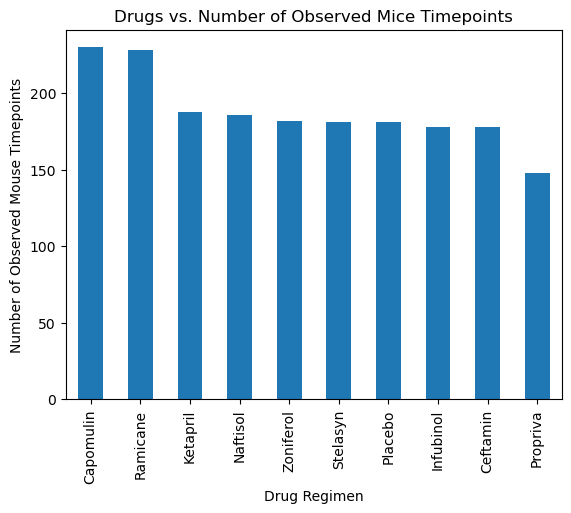

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = cleaned_df['Drug Regimen'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Drugs vs. Number of Observed Mice Timepoints')
plt.show()

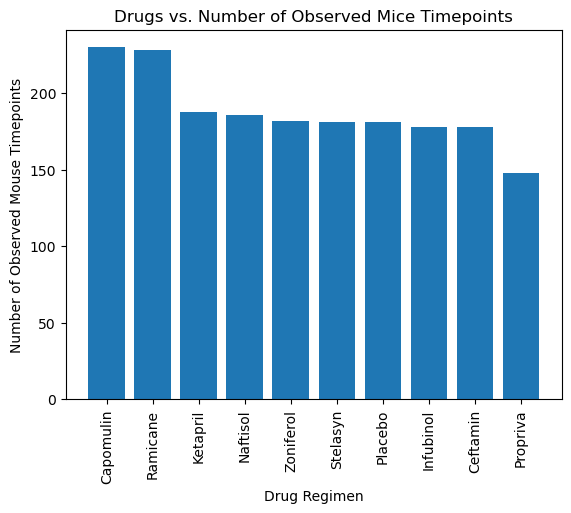

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Get data to plot
counts = cleaned_df['Drug Regimen'].value_counts()

#Plot it
plt.bar(counts.index.values, counts.values)

#Clean it
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Drugs vs. Number of Observed Mice Timepoints')
plt.show()

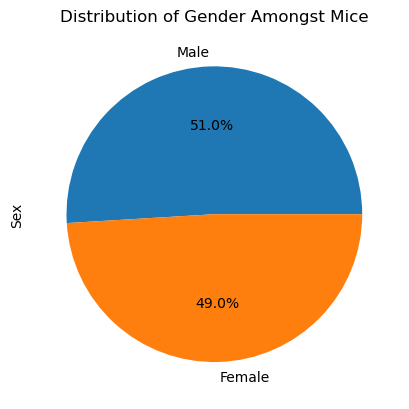

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genders = cleaned_df['Sex'].value_counts()

genders.plot(kind='pie', autopct='%.1f%%')

plt.ylabel('Sex')
plt.title('Distribution of Gender Amongst Mice')
plt.show()

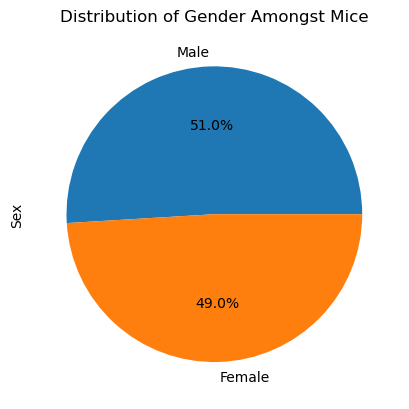

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = cleaned_df['Sex'].value_counts()

plt.pie(genders.values, labels=genders.index.values, autopct='%.1f%%')

plt.ylabel('Sex')
plt.title('Distribution of Gender Amongst Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time_df = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max()
max_time_df = max_time_df.reset_index()
#max_time_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tumor_df = cleaned_df.merge(max_time_df, how='right', on=['Mouse ID', 'Timepoint'])
max_tumor_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    tumor_vol = max_tumor_df.loc[max_tumor_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(tumor_vol)
        
    # Determine outliers using upper and lower bounds
    #Create quartiles
    quartiles = tumor_vol.quantile([.25,.5,.75])
    #Identify upper annd lower bounds
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #Outliers are points that lie outside of the bounds
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


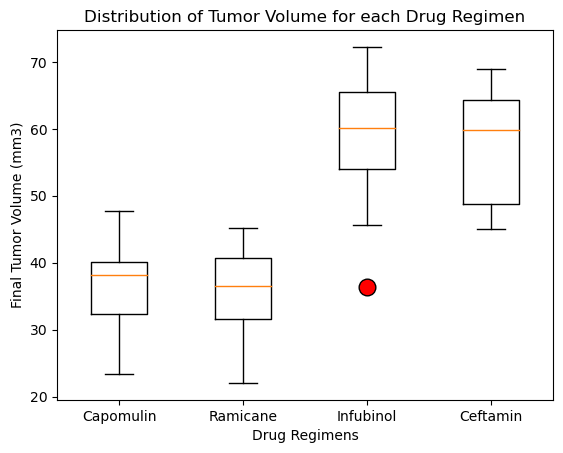

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_data

#Stylize the chart
fprops = dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=12)

plt.boxplot(tumor_volume_data, labels=treatments, flierprops=fprops) #flierprops=orange_out
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimens')
plt.title('Distribution of Tumor Volume for each Drug Regimen')
plt.show()

## Line and Scatter Plots

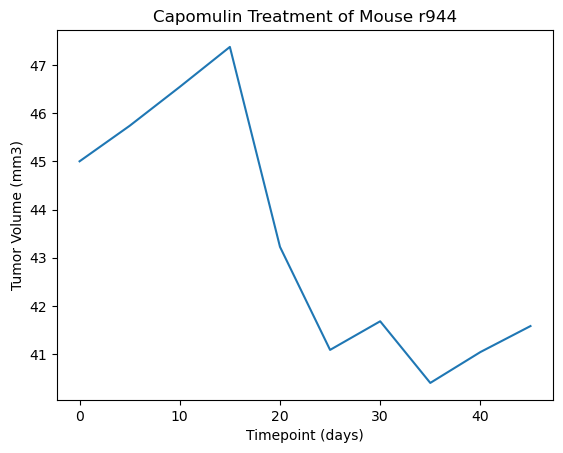

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mice = cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin'] #Find Capomulin Mice
r944 = capomulin_mice.loc[capomulin_mice['Mouse ID']=='r944'] #Pick a mouse

#Plot it
plt.plot(r944['Timepoint'], r944['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Capomulin Treatment of Mouse r944')

plt.show()

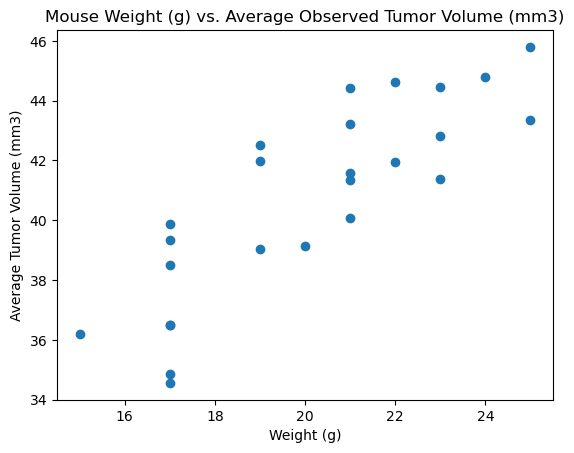

In [73]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

grouped_capomulin_mice = capomulin_mice.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
capomulin_mice_weights = capomulin_mice.groupby(['Mouse ID'])['Weight (g)'].mean()
#Plot it
plt.scatter(capomulin_mice_weights.values, grouped_capomulin_mice.values)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight (g) vs. Average Observed Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

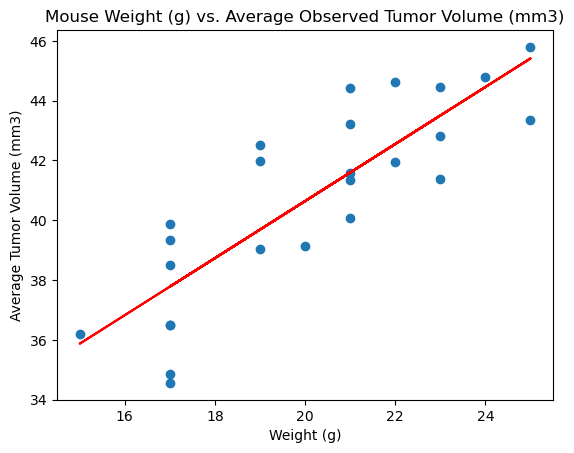

In [74]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

#Calculate correlation coefficient and lin reg model
x_values = capomulin_mice_weights.values
y_values = grouped_capomulin_mice.values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight (g) vs. Average Observed Tumor Volume (mm3)')

plt.show()